<a href="https://colab.research.google.com/github/taraliu23/Urban-Data-Science/blob/tara/Week13_CV_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Urban Data Science Lecture Week 13

## Computer Vision for Urban Planning

 🚌🚶‍♀️Google Street View (GSV) and Computer Vision 🖥️ 👀

### Step-by-step Tutorial for downlaoding Google Street View images

🔔 **Question**: A quick question to help you understand better.<br>
🥊 **Challenge**: Interactive exercise. We'll work through these in the lab!<br>
💡 **Tip**: How to do something a bit more efficiently or effectively.<br>
📖 **Documentation**: Links to official documentation or additional reading materials to deepen your understanding.<br>


### GSV Price and Limits

📖 **Documentation**: [Google Street View Official Documentation](https://developers.google.com/maps/documentation/streetview/usage-and-billing)

- Requests up to 25,000 per day require an API key.
- 7.00 USD per 1000 under 100,000 monthly volume.
- 200 USD Usage credit every month for no charge!

- You can download 10,000 static street views for free every month, according to the [pricing calculator](https://mapsplatform.google.com/pricing-calculator/)

* Be sure to monitor your API usage, and read the latest documentation in case anything change, if you are downloading a large amount of images.

## Step 1: Set Up

1. (Optional) Change runtime to GPU/TPU for faster computing.

    Steps:
    Top right corner "Runtime" -> Change runtime type -> Hardware accelerator -> T4 GPU -> Save



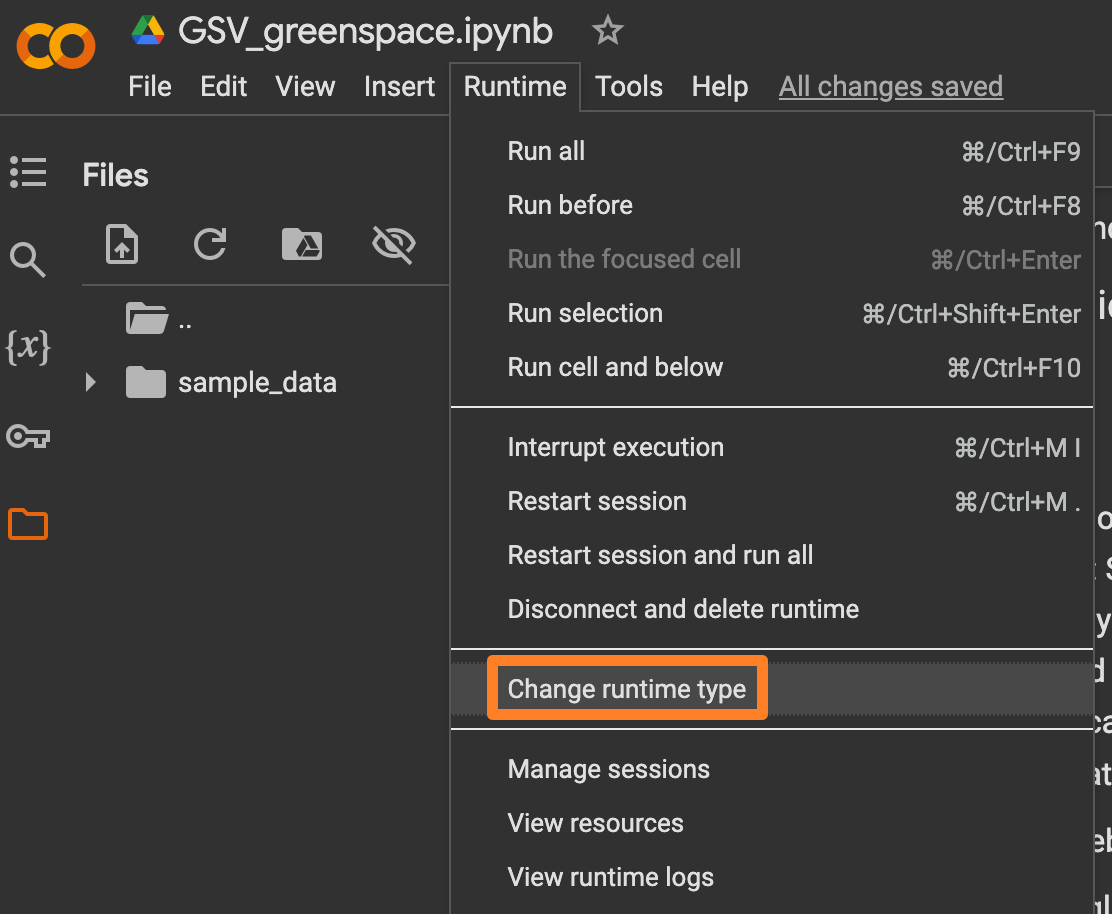

In [ ]:
Image('/content/step1_1.jpg', width=400)

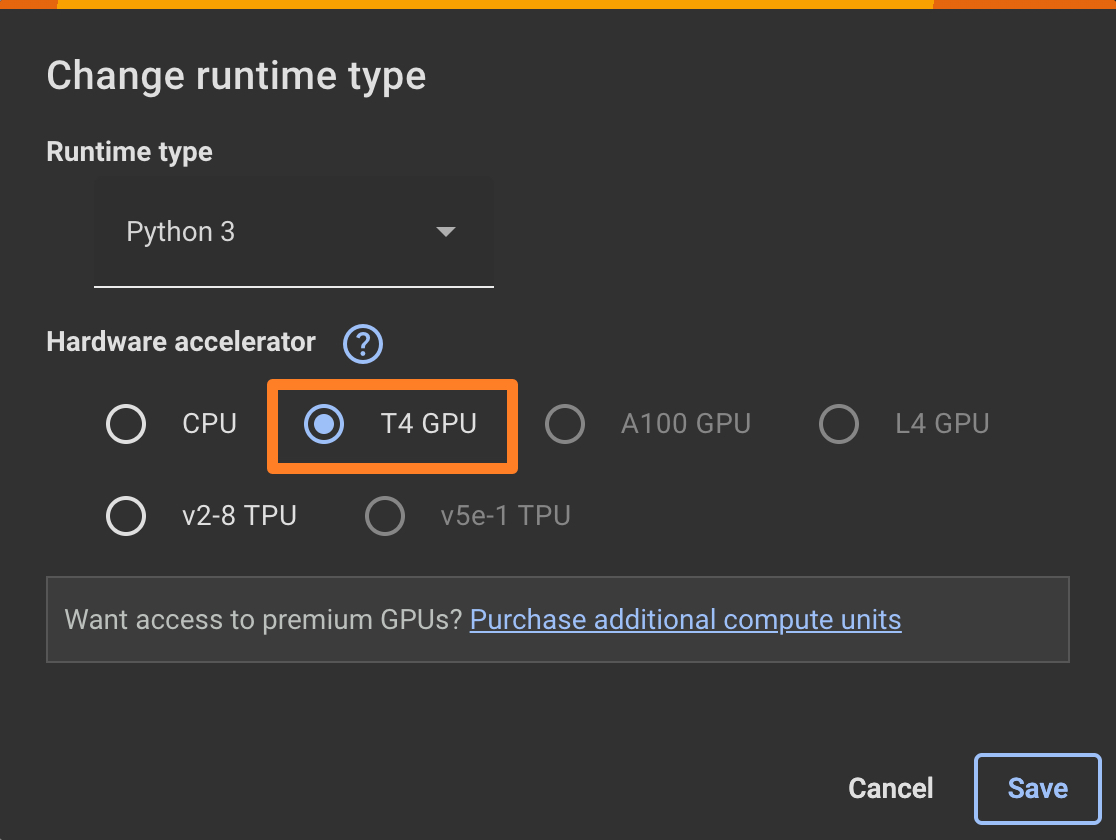

In [ ]:
Image('/content/step1_2.jpg', width=400)

In [ ]:
# monitor current hardware accelerator
! nvidia-smi

Tue Apr  1 20:12:50 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   42C    P8             10W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

2. Install Required Libraries

In [ ]:
! pip --quiet install \
google_streetview \
opencv-python \
keras-segmentation \
pandas \
geopandas \
numpy \
matplotlib \
folium \
tqdm \
ultralytics

  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 17.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 753.3/753.3 kB 13.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 976.9/976.9 kB 30.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 81.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 90.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 52.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 10.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 6.9 MB/s eta 0:00:00


3. Set API key

Steps: Set up a Google Cloud project -> Create an API Key for static street view download

(You don't need to mannually create project/ API Keys, just run cells below)

**Remember: 🤫 Do not share your API Key and credentials to anyone! 🤫**


In [ ]:
# use google cloud sdk to login in google account

! gcloud auth login --no-launch-browser --quiet
# follow the cell output, click on the auth link, copy the verficication code, and paste in the blinking cursor.

In [ ]:
! gcloud projects create "urban-data-science-gsv-1"

Create in progress for [https://cloudresourcemanager.googleapis.com/v1/projects/urban-data-science-gsv-1].
Enabling service [cloudapis.googleapis.com] on project [urban-data-science-gsv-1]...
Operation "operations/acat.p2-429475845908-3b355b19-9b67-4902-8e19-bf58177a7d68" finished successfully.


In [ ]:
! gcloud alpha services api-keys create \
    --project "urban-data-science-gsv-1" \
    --display-name "Street_View_Static_API_Key"\

In [ ]:
! gcloud services api-keys list --project="urban-data-science-gsv"

## 🥊 **Challenge**: Download Google Street View Images

In [ ]:
# import all necessary packages！
import google_streetview.api

from google.colab import userdata

import os
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
import folium
import torch
import json
import seaborn as sns

from PIL import Image
from ultralytics import YOLO
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array

from tqdm import tqdm
from tqdm.notebook import trange, tqdm

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [ ]:
def download_gsv_images(locations_df, api_key):
    """
    Downloads Google Street View images based on coordinates from a dataframe.

    Args:
        locations_df (pd.DataFrame): A Pandas DataFrame with a 'latitude' and 'longitude' column.
        api_key (str): Your Google Street View Static API key.
    """

    # os.makedirs("gsv_images", exist_ok=True)
    os.makedirs("/content/drive/MyDrive/gsv_images", exist_ok=True)

    for index, row in locations_df.iterrows():
        latitude = row['latitude']
        longitude = row['longitude']
        location = f"{latitude},{longitude}"
        params = [{
            "size": "640x640",
            "location": location,
            "heading": "0", # could also be 90, 270, 360
            "pitch": "0",
            "key": api_key
        }]
        try:
            results = google_streetview.api.results(params)
            results.download_links(f"gsv_images/image_{index}")
            print(f"Downloaded image for location: {location}")
        except Exception as e:
            print(f"Error downloading image for {location}: {e}")



In [ ]:
def read_marta_stops_geojson(filepath):
    """Reads a GeoJSON file containing MARTA stop locations and returns a DataFrame with coordinates.

    Args:
        filepath (str): The path to the GeoJSON file.

    Returns:
        geopandas.GeoDataFrame: A GeoDataFrame containing the location data of MARTA stops.
                                Returns None if the file is not found or an error occurs.
    """
    try:
        gdf = gpd.read_file(filepath)
        # Rename columns
        gdf = gdf.rename(columns={"stop_lat": "latitude", "stop_lon": "longitude"})
        return gdf

    except FileNotFoundError:
        print(f"Error: File not found at {filepath}")
        return None
    except Exception as e:
        print(f"An error occurred: {e}")
        return None

In [ ]:
gdf = read_marta_stops_geojson('/content/MARTA_Stops.geojson')

In [ ]:
# download gsv dataset
download_gsv_images(gdf[['latitude','longitude']], userdata.get('Street_View_Static_API_Key'))

Downloaded image for location: 33.754553,-84.469302
Downloaded image for location: 33.753328,-84.445329
Downloaded image for location: 33.753247,-84.445568
Downloaded image for location: 33.754517,-84.469824
Downloaded image for location: 33.920862,-84.344213
Downloaded image for location: 33.823385,-84.369357
Downloaded image for location: 33.823492,-84.369324
Downloaded image for location: 33.92113,-84.344268
Downloaded image for location: 33.860329,-84.339245
Downloaded image for location: 33.859989,-84.339397


KeyboardInterrupt: 

In [ ]:

!zip -r /content/gsv_images.zip /content/gsv_images

  adding: content/gsv_images/ (stored 0%)
  adding: content/gsv_images/image_7/ (stored 0%)
  adding: content/gsv_images/image_7/gsv_0.jpg (deflated 1%)
  adding: content/gsv_images/image_7/metadata.json (deflated 16%)
  adding: content/gsv_images/image_10/ (stored 0%)
  adding: content/gsv_images/image_3/ (stored 0%)
  adding: content/gsv_images/image_3/gsv_0.jpg (deflated 0%)
  adding: content/gsv_images/image_3/metadata.json (deflated 14%)
  adding: content/gsv_images/image_1/ (stored 0%)
  adding: content/gsv_images/image_1/gsv_0.jpg (deflated 1%)
  adding: content/gsv_images/image_1/metadata.json (deflated 15%)
  adding: content/gsv_images/image_9/ (stored 0%)
  adding: content/gsv_images/image_9/gsv_0.jpg (deflated 2%)
  adding: content/gsv_images/image_9/metadata.json (deflated 16%)
  adding: content/gsv_images/image_8/ (stored 0%)
  adding: content/gsv_images/image_8/gsv_0.jpg (deflated 1%)
  adding: content/gsv_images/image_8/metadata.json (deflated 15%)
  adding: content/gsv_